## Домашнє завдання на тему "Перевірка вибірки на нормальність"

0.Зчитайте дані з `data.csv` та запишіть значення колонки data у форматі np.ndarray в змінну data. Ми будемо далі працювати з цією змінною.

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, probplot, shapiro

data_path = 'data/data.csv'
df = pd.read_csv(data_path)
data = df["data"].to_numpy()

Запустіть код нижче. Для коректної робити всіх подальших методів дані мають бути у вигляді одновимірного вектора, тобто мати розмір (100,).

In [138]:
data.shape

(100,)

## Перевірка вибірки на нормальність

1.**Візуалізація розподілу**

Подивимось спершу на розподіл наших даних. Для цього побудуємо розподіл даних (графік на вигляд як гістограма, тільки він нормований так, аби сума під кривою була рівна 1), а на нього накладемо лінійний графік щільності (PDF - для побудови використовуємо `scipy.stats.norm.pdf(...)`) теоретичного нормального розподілу з середнім та стандартним відхиленням як у наших даних.

Візуалізацію будуємо за аналогією прикладу, що наводився у лекції, коли ми будували кілька кривих щільності для одних і тих самих даних, тільки значно більш спрощено, бо розподіл для порівняння у нас лише один - нормальний.

Побудуйте графік як наведено в очікуваному результаті та напишіть ваш висновок, чи схоже, що дані розподілені нормально?

Підказка: весь графік будується за 6 рядків коду, три з яких - підписи осей і графіку. Аби побудувати лінійний графік функції щільності та він наклався на гістограму, необхідно задати значення іксів з діапазону значень наших даних. Ці значення вже задані для вас, залишилось дописати 5 рядочків коду :)

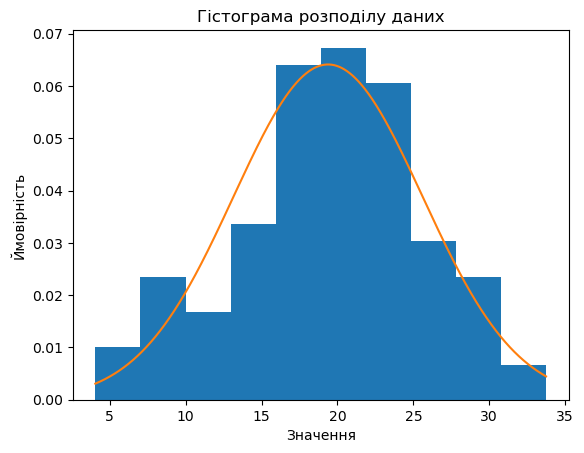

In [140]:
x_axis = np.arange(data.min(), data.max(), 0.01)
mean_data = np.mean(data)
std_data = np.std(data)

plt.hist(data, density=True)
plt.plot(x_axis, norm.pdf(x_axis, mean_data, std_data))
plt.title('Гістограма розподілу даних')
plt.xlabel('Значення')
plt.ylabel('Ймовірність')
plt.show()

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1SB_HOIgwfZXrtglBBlDfMYjg2eGGBSIX)


2.**QQ графік**

Ще одним візуалізаційним методом перевірки розподілу вибірки даних на нормальність є графік квантиль-квантиль, Q-Q графік або QQ графік. У лекції ми розбирали, що це за графік, та як його інтерпретувати.

Побудуйте QQ-Plot для порівняння з нормальним розподілом наших даних та напишіть висновок з графіку, чи можна сказати, що дані розподілені за нормальним законом?

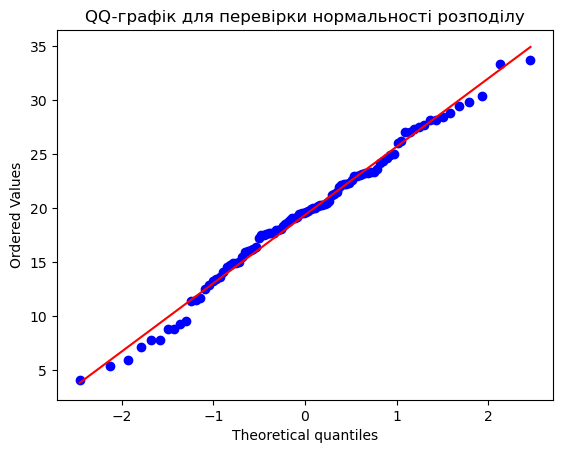

In [142]:
probplot(data, dist="norm", plot=plt)
plt.title("QQ-графік для перевірки нормальності розподілу")
plt.show()

Після побудови графіку можемо зробити висновок, що точки на графіку приблизно лежать на прямій лінії, це вказує на те, що набір даних відповідає припущеному розподілу, тобто дані розподілені за нормальним законом.

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1-eDd16OVgqEjzFUBjJJzSMcwSrzNNm_V)

3.**Тест Шапіро-Вілка**

Тест Шапіро-Вілка визначає для вибірки, наскільки ймовірно, що вона була витягнута з нормального розподілу.
Нульова гіпотеза H0 тесту Шапіро-Вилка полягає в тому, що випадкова величина, вибірка якої відома, розподілена за нормальним законом. Альтернативна гіпотеза H1 полягає в тому, що закон розподілу **не** є нормальним.

**Задача**: протестувати нашу вибірку на нормальність з допомогою теcта Шапіро-Вілка, реалізованого в функцію [scipy.stats.shapiro](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html). Висновок зробіть на основі аналізу p-значення. На рівні значущості = 0.05 чи можемо ми відхилити гіпотезу Н0? Відповідь можна надати текстом, або написати простий if-else блок для виведення висновку спираючись на отримане p-значення. Нагадування:
- p <= alpha: відхиляємо H0.
- p > alpha: не можемо відхилити H0.

Також пропоную вам переглянути оце [відео](https://youtu.be/eh9eYLBecWk), тут розказується про QQ графік, тест Шапіро, та звʼязок між ними.


In [147]:
stat, p_value_shapiro = shapiro(data)
print("Тест Шапіро-Вілка:")
print("Статистика тесту:", stat)
print("P-значення:", p_value_shapiro)

if p_value_shapiro > 0.05:
    print("\nЗа результатами тесту Шапіро-Вілка дані мають нормальний розподіл (не відхиляємо H0).")
else:
    print("\nЗа результатами тесту Шапіро-Вілка дані не мають нормального розподілу (відхиляємо H0).")

Тест Шапіро-Вілка:
Статистика тесту: 0.9887855685963715
P-значення: 0.5677973106978921

За результатами тесту Шапіро-Вілка дані мають нормальний розподіл (не відхиляємо H0).
